<a href="https://colab.research.google.com/github/ehud/Notes/blob/master/Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python version of example from here: https://stats.stackexchange.com/questions/17336/how-exactly-does-one-control-for-other-variables

R version with step by step explanations: https://colab.research.google.com/drive/1sGCECEFcLCj4T-sUgbl_wPDn_TaREcna

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
covariate=np.random.randint(0,2,100)

In [0]:
 exposure =random.uniform(0,1,(100,))+(0.3*covariate)

In [0]:
outcome   = 2.0+(0.5*exposure)+(0.25*covariate)

In [9]:
import pandas as pd
from statsmodels.formula.api import ols

data=pd.DataFrame({'covariate':covariate,'exposure':exposure,'outcome':outcome})
results = ols('outcome ~ exposure',data=data).fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.742    
Dependent Variable: outcome          AIC:                -141.5737
Date:               2019-05-02 20:12 BIC:                -136.3634
No. Observations:   100              Log-Likelihood:     72.787   
Df Model:           1                F-statistic:        285.7    
Df Residuals:       98               Prob (F-statistic): 8.36e-31 
R-squared:          0.745            Scale:              0.013934 
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     2.0231     0.0281   72.0657   0.0000   1.9674   2.0788
exposure      0.6404     0.0379   16.9027   0.0000   0.5652   0.7156
------------------------------------------------------------------
Omnibus:              521.416       Durbin-Watson:          1.763 
Prob(Omnibus):        0.000         Jarque-Bera (JB):       10.336
Skew:                 0.087         Prob(JB):               0.006 
Kurtosis:             1.435         Condition No.:          5     
==================================================================

"""

In [10]:
results = ols('outcome ~ exposure+covariate',data=data).fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS              Adj. R-squared:     1.000     
Dependent Variable:  outcome          AIC:                -6470.3043
Date:                2019-05-02 20:12 BIC:                -6462.4888
No. Observations:    100              Log-Likelihood:     3238.2    
Df Model:            2                F-statistic:        5.923e+29 
Df Residuals:        97               Prob (F-statistic): 0.00      
R-squared:           1.000            Scale:              4.5136e-30
--------------------------------------------------------------------
          Coef.  Std.Err.           t           P>|t|  [0.025 0.975]
--------------------------------------------------------------------
Intercept 2.0000   0.0000 3944752018701820.5000 0.0000 2.0000 2.0000
exposure  0.5000   0.0000  686731232963876.1250 0.0000 0.5000 0.5000
covariate 0.2500   0.0000  550037902076897.2500 0.0000 0.2500 0.2500
--------------------------------------------------------------------
Omnibus:               1.500         Durbin-Watson:            0.060
Prob(Omnibus):         0.472         Jarque-Bera (JB):         1.321
Skew:                  0.126         Prob(JB):                 0.517
Kurtosis:              2.497         Condition No.:            5    
====================================================================

"""

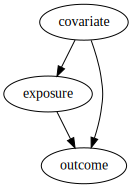

In [7]:
import graphviz
from graphviz import Digraph
from ipywidgets import Image

dot = Digraph()
dot.node('c', 'covariate')
dot.node('e', 'exposure')
dot.node('o', 'outcome')
dot.edges(['ce','co','eo'])

#print(dot.source)
graphviz.Source(dot)

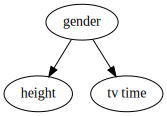

In [8]:
# different case. try to simulate, and control (this is a simpler case than the one above)

dot = Digraph()
dot.node('g', 'gender')
dot.node('h', 'height')
dot.node('t', 'tv time')
dot.edges(['gh','gt'])
graphviz.Source(dot)